<div class="alert alert-block alert-info">

**Accessibility of the notebook:**
- You can adjust the width of the text with the function provided below. Copy it into a new code cell and execute it using the `ipykernel`.
    ```python
    from IPython.core.display import HTML
    def set_width(width):
        display(HTML(f"""<style>  
                .container {{ width:{width}% !important; 
                                min-width:800px !important; margin: 0 auto}} 
                .jp-Cell {{ width:{width}% !important; 
                                min-width:800px !important; margin: 0 auto}} </style>"""))
    # Set container width to X% of the fullscreen 
    set_width(50)
    ```
- You can toggle the auto-numbering of the sections in the outline toolbox (sidebar or topbar).
- You can toggle the code line numbers in the dropdown menu of the "view" button in the topbar. 
- You can collapse/expand a cell by clicking the blue bar on the left side of the cell.

</div>

In [1]:
from IPython.core.display import HTML
def set_width(width):
    display(HTML(f"""<style>  
            .container {{ width:{width}% !important; 
                            min-width:800px !important; margin: 0 auto}} 
            .jp-Cell {{ width:{width}% !important; 
                            min-width:800px !important; margin: 0 auto}} </style>"""))
# Set container width to X% of the fullscreen 
set_width(50)

No serial connected
  %serialconnect to connect
  %esptool to flash the device
  %lsmagic to list commands

Experiments of this week:
-   experiment 2A: Investigate the AC/DC coupling and the AC frequency dependency with the oscilloscope
-   experiment 2B: Apply the correct triggering between function generator and oscilloscope
-   experiment 2C: Use the picopi to measure the Thevenin equivalent of a circuit

Goal: Understanding the use of an oscilloscope (voltage, triggering) and the use of the ALPACA 

Structure of experiment:
- Background+ Installation + Anticipate (15+5+30+25 min): per person. This is homework.
- Simulate (10 min): use LTSpice to verify your prediction
- Implement & Investigate (10+30+5+5 min): with partner (group of 2)
- Compare & Conclude (10 min): with group of 4 (per table)

# 2C:  Thevenin equivalent 

> <font color='blue'>Learning goal:</font> Predict the Thevenin equivalent of a circuit and measure it with the Alpaca. 

## Background Thevenin
> <font color='grey'>⏳ Estimated time: 15 min</font>

You can replace each complicated circuit with one or multiple sources with many resistors, by a much simpler one with only one source and one resistor. This one source can be a voltage source (Thevenin equivalance) or current source (Norton equivalence): 

<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/main/LTS/2C_thev_norton_equiv.JPG          " width=50% ></img>

Measuring the Thevenin voltage of any complex circuit can be done by placing a voltage meter (with infinite resistance) at the location of Vout.  <br>
Measuring the Norton current is done by placing a current meter (with no resistance) at the location of Vout.<br>
Since the two equivalents behave the same, you can deduct that Rth=Rn=Vth/In.
You can measure this equivalent resistance by turning off the sources, and measure the resistance at Vout. If you do this on paper, you will:
1. replace the sources by their internal resistance
    * a current source has infinite resistance (hence is replaced by a broken wire)
    * a voltage source has no resistance (hence is replaced by a wire)
2. combine all resistors, start with the one furthest away from the measurement point (Vout)

If you have multiple sources, then you need to use superposition: 
* replace all other sources by their internal resistance
* derive the contribution of each source independently
* sum all contributions of all sources.  

Note, when looking at the resistances of meters and/or sources, please remember:
* a current source and a volt meter have (ideally) infinite resistance, and are replaced by a broken wire
* a voltage source and a current meter have (ideally) no resistance, and are replaced by a connected wire

Watch the movie(s) below on the Thevenin equivalent (voltage source+resistor) and Norton equivalent (current source plus resistor).

If the movies don't run, you could try to switch the Kernel to python3. For the use of the picopi, you will later on have to switch it back to ALPACA-kernel

In [3]:
%serialconnect to --port="COM3" 

Connecting to --port=COM3 --baud=115200 
Ready.


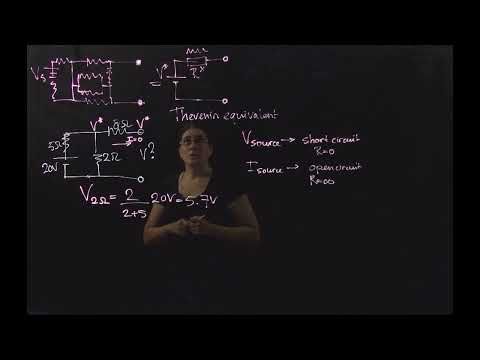

In [1]:
# thevenin equivalent: derivation 
%python
from IPython.lib.display import YouTubeVideo
YouTubeVideo('UQ8ykDXDQgw', width = 600, height = 450)

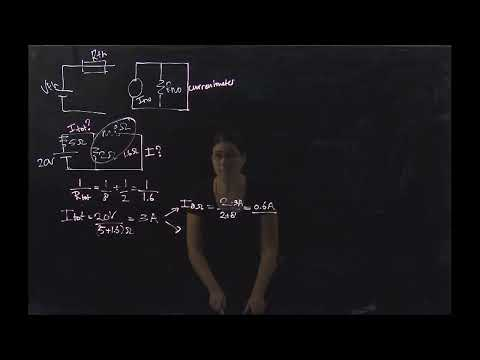

In [2]:
# norton equivalent: 
%python
from IPython.lib.display import YouTubeVideo
YouTubeVideo('l1iYdBq1pvc', width = 600, height = 450)


## Background ALPACA & installation software 
> <font color='grey'>⏳ Estimated time: 5 +30  min</font>

You'll be learning to how take electronic measurements by means of programmed instructions. For this you will not only use  the classroom equipment, but also an ALPACA. This Advanced Learning Platform for Analog Circuits and Automation (https://zenodo.org/record/5615137) is developed specifically for this course by Jeroen Bastemeijer. In short: the ALPACA is a "pocket Studio Classroom" with devices on board you can use to do experiments. 

Go to the intro manual, read the introduction, and install the software:
https://mwdocter.github.io/TeachBook/main/EI_manuals/intro_ALPACA.html

## Anticipate: What will be the Thevenin equivalent of the following circuit?
> <font color='grey'>⏳ Estimated time: 25 min</font>

In the following circuit two sources are used: V1 and V2. With help of a set resistors these two sources are combined. 

<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/main/LTS/thevenin circuit ALPACA.JPG" width=50%></img>

* Predict which voltage you would measure between location A and B (=V_thevenin)
* If you replace this circuit by its equivalent one with a source with V_thevenin, which (Thevenin) resistor would you need to add?



In [7]:
### TO DO=" your predicted values "


## Simulate: find the Thevenin equivalent of the above circuit 
> <font color='grey'>⏳ Estimated time: 10 min</font>

From now on, LTSpice will be used to verify your written predictions. In order to reduce the workload in this assignment, reuse your stacked voltage divider simulation. Don't forget to save it under a different name. 
As can be seen in the figure below, you use the same resistors, but different voltage sources. 

* What is the Thevenin voltage? (Hint: Vthevenin= Vout1=Vout2)
* Find the Thevenin resistance, via the Norton current. 
    * add a small resistor (1e-6, or 1e-9) at the bottom, to connect Vout to ground.
    * measure the current through the small resistor, this is the Norton current
* if your simulation and prediction do not agree, solve your mistake

In [8]:
### TO DO=" your predicted and simulated values "


## Implement &Investigate 1: Measure a voltage with the ALPACA
> <font color='grey'>⏳ Estimated time: 15 min</font>

There are two ways of measuring the voltage: with the voltmeter, and reading an Anolog Input Channel. 

The PicoPi can only handle voltages up to 3.3V. Therefore, it is highly recommended to test the voltage level of your output signal with the voltmeter before connecting it to the picoPI. 

###  Downloading this Notebook 

Go to https://mwdocter.github.io/TeachBook/main/EI_manuals/intro_ALPACA.html and follow the steps to download and run this notebook locally.

With the ALPACA you can generate and acquire digital and analog signals. Introducing you to all of that is too much for today, so we will focus on doing building a circuit and measuring the generated Vout.

### Make a variable voltage source, and measure Vout with the voltmeter
* At the **potentiometer** (AKA "potmeter") on the Alpaca, connect the leftmost pin to +12V and the rightmost pin to -12V. +12V and -12 V can be found just below the white breadboard. 

<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/a894a02ef157ca15d3d118eb243245eb912ba4f0/PicoPI/picopi1_15_potmeter.jpg" width=50% style="float:right"></img>

* The middle pin of the potmeter goes to the Voltmeter (left column 4th pin of the Multifunction connector on the Cria). 

<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/a894a02ef157ca15d3d118eb243245eb912ba4f0/PicoPI/picopi1_17_voltmeter 2.jpg" width=50% style="float:right"></img>

* Turn the knob of the potmeter, and observe the polarity and voltage levels change (visualised by the LEDs of the voltmeter). 
    * What would the color of the voltmeter LED mean?
    * Which voltages (and polarity) are allowed on Digital In pin `Din3 - GP21`?
    * What happens to the voltage measured, if you remove the wire connected to the +12V of the potmeter? What would have happened with the Alpaca input pins? What does this mean for cleaning up the circuit, which wire to start with?



In [9]:
### TO DO=" which voltages and polarity are allowed on the digital pins" 


### TO DO="what happens if you remove +12V? In which order should you clean up the circuit?" 


<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/main/PicoPI/2c_voltmeter_test.jpg" width="75%"/>

* Pay attention to cleaning up the circuit: **remove the signal wires first**. So first remove the wire from the middle pin. **WHY?** Well, if you remove one of the outer pins, there is no divider and current anymore, and the middle pin goes to the still attached + or -12V. 
* Luckily the middle pin was connected to the voltmeter, but if it was connected to the Analog or Digital Inputs you would have damaged your picoPI (replacement is possible, but depends on availability of our soldering expert and results in delay on your side). 

Feel free to watch the recording with some extra tips on the voltmeter and the ALPACA all the way at the bottom of this assignment. 

## Implement&Investigate 2: Build the circuit on the Alpaca Breadboard
> <font color='grey'>⏳ Estimated time: 30 min</font>



### Find the correct resistors
In order to find the right resistors amongst all provided to you, look at their color coding:

<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/a894a02ef157ca15d3d118eb243245eb912ba4f0/PicoPI/picopi2_3_pico1-resistor_colors.jpg" width=35% ></img>
    
In this practicum, you'll mostly encounter 4-band or 5-band color code. For example a 10k resistor can be:
* 4 band brown (1)- black (0) - orange (3) - (some tolerance) --> 10 * 10^3 = 10000
* 5 band brown (1)- black (0) - black (0) - red (2) - (some tolerance) --> 100 * 10^2 = 10000

Feel free to use online resistor color code calculators like https://www.digikey.com/en/resources/conversion-calculators/conversion-calculator-resistor-color-code

### Using the breadboard
    
The breadboard has the pins on a row (in the middle) and column (on the edges) connected. Therefore wisely position your resistor (vertically). :  
    
<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/a894a02ef157ca15d3d118eb243245eb912ba4f0/PicoPI/picopi2_4_pico1-use_breadboard.jpg" width=70% ></img>

### Build the circuit on the breadboard

Check out the intro manual, how the rows and columns of pins are interconnected:
https://mwdocter.github.io/TeachBook/main/EI_manuals/intro_ALPACA.html

### Connect Vin and measure the output power with the Voltmeter

The Vin comes from 3V3 OUT and 5V Vsys, and you measure with the voltmeter. Only if it is safe (+ polarity, <3.5V), you can continu to the next part, record the analog Vin via the Alpaca. 

## Implement&Investigate 3:  Connect to the Alpaca 
> <font color='grey'>⏳ Estimated time: 5 min</font>

Before starting, a connection to the ALPACA needs to be established. This is done by using a micro-USB cable to connect the PicoPi to a PC. It is described in the 'Connect to' section of https://mwdocter.github.io/TeachBook/main/EI_manuals/intro_ALPACA.html#connect-to-the-alpaca


**Now it is time to connect.** In the cell below, enter the appropraite `COM` port. Your code should look something like: 

`%serialconnect to --port="COM4"`

In [10]:

%serialconnect to --port="COM3" 


Connecting to --port=COM3 --baud=115200 
Ready.



> <font size=6>ℹ️</font>
    >
    > <font color='00a6ed'>
If everthing went well, the cell should give a response that looks like: 
>
> `Connecting to --port=COM4 --baud=115200`
>
> `Ready.`

> If is is not the case, please check the hints in the intro manual


## Implement&Investigate 4: Generate a since and record Vout 
> <font color='grey'>⏳ Estimated time: 5 min</font>

Only when it is safe, connect Vout not only to the voltmeter but also to pin Ain0 (also on the mulitfunction connector). Run the code below and see whether you measured the Thevenin voltage of the circuit correctly. 

In [12]:
from functiongenerator import FuncGen, Sine
import machine
import time
 
a0 = machine.ADC(26)

samples = []

with FuncGen(Sine(Vpp=2, offset=2, freq=25)):
    voltage = a0.read_u16() * 5.0354e-05 
    ## 3.3V corresponds to 32 bits, or 2**32=65536. From this you can derive the conversion factor 5.034e-05
    samples.append(voltage)
print(samples)



[3.276585]


In [ ]:
### TO DO ="which voltage did you find and does it agree with your simulate results"



<font color = 'blue'> Hint: </font> Your experimental values should be close enough to your simulated ones. If they are not, try trouble shooting steps below and call your TA!



> <font size=6>🔥</font>  
>
> <font color='ff6723'> Troubleshooting tips, if you don't measure the expected voltage
    
> * Is the value is close enough (the last band of the resistor is the tolerance)
    
> * If the measured value is far off:
>     * if it is close to 0.07V: <br> this is the noise on an open channel. Most likely you have not yet connected the wire to the correct analog input channel
>     * for other values: narrow down the issue: <br>disconnect the wire between V1_out and V2_out, and measure the 2 voltage dividers individually, first with the voltmeter to see the levels are safe, then with Ain0 and running the code. It could be you have to adapt the location of the wire and/or resistors. After checking the individual dividers are working correclty, connect V1_out and V2_out and measure V_thevenin. 

 >### <font color='red'>Optional challenge </font>
 > you know measure the Thevenin voltage, but not yet the Thevenin resistance. WIth the Alpaca you can only measure voltage. 
 > 1. imagine you could add an additional small load, say 100 $Ohm$, how could you use that in order to determine Thevenin resistance (in combination with your above measurement)
 > 2. Add such resistor, do the measurement, and derive Thevenin resistance. Does it match your prediction?

In [1]:
### TO DO ="optional challenge: describe how you found the value for the Thevenin resistance"


No serial connected
  %serialconnect to connect
  %esptool to flash the device
  %lsmagic to list commands

## Compare&Conclude
> <font color='grey'>⏳ Estimated time: 10 min</font>

* Wait till all (4) group members finish their observation
* Compare your results with your other group members. 
* If your results agree, and are in line with all predictions, then talk to a TA and get checked off
* Otherwise, so if your results do not agree, or your results are not in line with your predictions, then first discuss amongst your group before getting a TA. 
 

**to be checked off by a TA:** <br>
1. Which voltages are safe to use on the Analog Input, and why you should use the Cria's Voltmeter before connecting Analog Input to the PicoPi?
2. the Thevenin equivalent of the given circuit schematic (including the measurement) 
3. exit card: 1. Write a brief abstract on what you learned (conclusion, useful graph), 2. Which troubleshooting skills do you want to remember for next sessions, 3. Which code do you copy for use in next sessions,
4. How do think this notebook could be improved

In [ ]:
#2C Thevenin

### TO DO="# What are the safe voltages for Ain, and 2. why to use the voltmeter on the Cria"

### TO DO="# 2.your values for the Thevenin equivalent, predicted and measured"

### TO DO="3a. abstract"

### TO DO="3b. troubleshooting"

### TO DO="3c. code"

### TO DO ="4. what changes would you suggest?"


In [ ]:
#at the end of an assignment: reboot&disconnect 
# (such that for the next assignment you can restart fresh again)
# and such that all Vout are switched off
%rebootdevice
%disconnect


When you can produce and record a sine wave, both your hardware and software allow you to use the ALPACA for further exercises! Congratulations! 

<font color='ff822d' size=6> 📝 <font> <font color='ff822d' size=4> **Todo**: <font>
 


In [ ]:
# recording voltmeter

from IPython.lib.display import YouTubeVideo
YouTubeVideo('djbOieC-fH4', width = 600, height = 450)

        

In [ ]:
#recording building the voltage dividers on the ALPACA
from IPython.lib.display import YouTubeVideo
YouTubeVideo('9AMlHRCkTU0', width = 600, height = 450)
